## Korčuľovanie na CartPole

> **Problém**: Ak chce Peter uniknúť vlkovi, musí sa pohybovať rýchlejšie ako on. Uvidíme, ako sa Peter môže naučiť korčuľovať, konkrétne udržiavať rovnováhu, pomocou Q-Learningu.

Najskôr nainštalujme knižnicu gym a importujme potrebné knižnice:


In [1]:
#code block 1

## Vytvorte prostredie cartpole


In [ ]:
#code block 2

Aby sme videli, ako prostredie funguje, spustime krátku simuláciu na 100 krokov.


In [ ]:
#code block 3

Počas simulácie potrebujeme získať pozorovania, aby sme sa rozhodli, ako konať. V skutočnosti nám funkcia `step` vracia aktuálne pozorovania, funkciu odmeny a príznak `done`, ktorý naznačuje, či má zmysel pokračovať v simulácii alebo nie:


In [ ]:
#code block 4

Môžeme získať minimálnu a maximálnu hodnotu týchto čísel:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Poďme tiež preskúmať inú metódu diskrétizácie pomocou intervalov:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Poďme teraz spustiť krátku simuláciu a pozorovať tieto diskrétne hodnoty prostredia.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


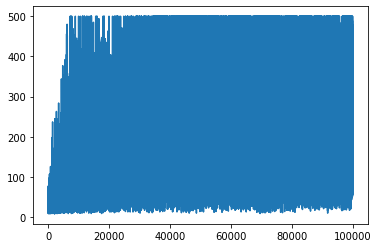

In [20]:
plt.plot(rewards)

Z tohto grafu nie je možné nič povedať, pretože kvôli povahe stochastického tréningového procesu sa dĺžka tréningových relácií veľmi líši. Aby sme tento graf lepšie pochopili, môžeme vypočítať **bežiaci priemer** cez sériu experimentov, povedzme 100. To sa dá pohodlne urobiť pomocou `np.convolve`:


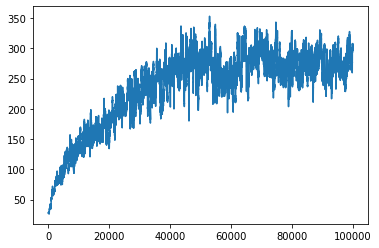

In [22]:
#code block 12

## Menenie hyperparametrov a sledovanie výsledkov v praxi

Teraz by bolo zaujímavé skutočne vidieť, ako sa správa natrénovaný model. Spustime simuláciu a budeme postupovať podľa rovnakej stratégie výberu akcií ako počas tréningu: vzorkovanie podľa pravdepodobnostného rozdelenia v Q-Tabuľke:


In [23]:
# code block 13

## Uloženie výsledku ako animovaný GIF

Ak chcete zapôsobiť na svojich priateľov, môžete im poslať animovaný GIF obrázok vyvažovacej tyče. Na to môžeme použiť `env.render` na vytvorenie obrazového rámu a následne ich uložiť ako animovaný GIF pomocou knižnice PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Upozornenie**:  
Tento dokument bol preložený pomocou služby AI prekladu [Co-op Translator](https://github.com/Azure/co-op-translator). Hoci sa snažíme o presnosť, prosím, berte na vedomie, že automatizované preklady môžu obsahovať chyby alebo nepresnosti. Pôvodný dokument v jeho rodnom jazyku by mal byť považovaný za autoritatívny zdroj. Pre kritické informácie sa odporúča profesionálny ľudský preklad. Nenesieme zodpovednosť za akékoľvek nedorozumenia alebo nesprávne interpretácie vyplývajúce z použitia tohto prekladu.
